In [5]:
#\-- IMPORT MODULES, CLASSES AND METHODS --/#

import zipfile                          #############################
import os                               # || FILE SYSTEM / UTILS || #
import copy                             #############################
from prettytable import PrettyTable

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

import numpy as np                  ###################################
import pandas as pd                 # || EXPLORATIVE DATA ANALYSIS || #
import matplotlib.pyplot as plt     ###################################
import seaborn as sns
# https://towardsdatascience.com/handling-missing-data-like-a-pro-part-3-model-based-multiple-imputation-methods-bdfe85f93087 NumPyro, impyute,

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

import sklearn
import re
import importlib
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn import naive_bayes                         #########################
from sklearn import neural_network                      #  |-----------------|  #
from sklearn import svm                                 # || MODEL SELECTION || #
from sklearn import tree                                #  |-----------------|  #
from sklearn import linear_model                        #########################

# from PrunedCV import PrunedCV

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import StratifiedKFold     ##########################
from sklearn.model_selection import ParameterGrid       # || MODEL VALIDATION || #
                                                        ##########################

%matplotlib inline


In [6]:
#\-- SET ENVIRONMENT --/#
# Before starting we need to store the data properly. We define an ad-hoc folder where we will store everything.
main_PATH = os.getcwd()

# We check whether we already have the data.                        
if 'data' not in os.listdir():                                      
                                                                    
    # Unzip files.
    with zipfile.ZipFile(r'summer_project_dataset.zip') as zip_ref:

        os.mkdir(main_PATH + '/data')   # We create the 'data' directory,
        os.chdir(main_PATH + '/data')   # we change directory,
    
        data_PATH = os.getcwd()         # we get the data path
        zip_ref.extractall(data_PATH)   # and we unzip there.       #####################
                                                                    # || FILE SYSTEM || #    
    file_PATH = data_PATH + '/summer_project_dataset'               #####################

else:

    # We just build the paths.
    data_PATH = main_PATH + '/data'
    file_PATH = data_PATH + '/summer_project_dataset'

# Finally, we go back to our main path.
os.chdir(main_PATH)

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# We also set a seed for reproducibility purposes.      #####################
SEED = 42                                               # || RANDOM SEED || #
np.random.seed(SEED)                                    #####################

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# LaTeX style plots.
plt.rcParams['figure.figsize'] = (12, 8)
# plt.rcParams['text.usetex']    = True         ############################
# plt.rcParams['font.family']    = 'serif'      # || DEFAULT PARAMETERS || #
# plt.rcParams['font.size']      = '10'         ############################

pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_rows', 10)


In [7]:
#\-- DATASET LOADING AND PREPROCESSING --/#
# Here we can optionally specify the names of the features and their type; warmly suggested.
# cols_names = ['']
# some variables are stored as float, but they are actually int. Two reasons why:
#       -) nan values are considered as float --> first estimate them and then change the data type.
#       -) there are inconsistencies, especially in kw_max_min where some int values are float instead.
# for the moment just let's store everything as float, but further inspections are needed.

data_types = {
              'url' : str, 'timedelta' : int, 'shares' : int, 'data_channel' : str, 'weekday' : str, 
              
              'n_tokens_title'          : int, 'n_tokens_content'       : int, 'n_unique_tokens' : float, 'n_non_stop_words' : float,
              'n_non_stop_unique_tokens': float, 'average_token_length' : float,

              'num_hrefs' : int, 'num_self_hrefs' : int, 'num_imgs' : float, 'num_videos' : float,
              
              'kw_min_min' : float, 'kw_max_min' : float, 'kw_avg_min' : float, 'kw_min_max' : float, 'kw_max_max'   : float,
              'kw_avg_max' : float, 'kw_min_avg' : float, 'kw_max_avg' : float, 'kw_avg_avg' : float, 'num_keywords' : float,
              
              'self_reference_min_shares' : float, 'self_reference_max_shares' : float, 'self_reference_avg_sharess' : float,
              
              'LDA_00' : float, 'LDA_01' : float, 'LDA_02' : float, 'LDA_03' : float, 'LDA_04' : float,
              
              'global_subjectivity' : float, 'global_sentiment_polarity' : float, 'global_rate_positive_words' : float, 'global_rate_negative_words' : float,
              
              'rate_positive_words' : float, 'rate_negative_words' : float,
              
              'avg_positive_polarity' : float, 'min_positive_polarity' : float, 'max_positive_polarity' : float, 'avg_negative_polarity' : float,
              'min_negative_polarity' : float, 'max_negative_polarity' : float,

              'title_subjectivity' : float, 'title_sentiment_polarity' : float, 'abs_title_subjectivity' : float, 'abs_title_sentiment_polarity' : float,
              }                                                    
                                                                   
                                                                   
data = pd.read_csv(file_PATH + r'/development.csv',                 
                   usecols = lambda column: column != 'id', dtype = data_types)              
# data.info(), data.describe()
# data = pd.read_csv(file_PATH + r'/development.csv',                 
 #                    usecols = lambda column: column != 'id')
# data.dtypes
data
# TODO: TURN WEEKDAY INTO NUMBERS! One-hot encoding or something ordinal?

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# We select only the columns that are filled with float64. We do this because in this branch we are doing no preprocessing.
# X = data.loc[:, data.columns != 'review/overall']
# X = X.loc[:, 'review/appearance' : 'review/taste']
# y = data.loc[:, 'review/overall']                                           #######################
#                                                                             # || PREPROCESSING || #
# # We do this just to try StratifiedKFold. We need categorical variables.    #######################
# X = np.array(X)
# new_y = copy.deepcopy(y)
# new_y = np.array(np.where(new_y > 3, 1, 0))  # Here we just encode the numerical label into a categorical one.

# X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size = 0.20, random_state = SEED,
#                                                         shuffle = True, stratify = new_y
#                                                    )



,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,http://mashable.com/2014/09/08/safest-cabbies-...,121,12,1015,0.422018,1.0,0.545031,10,6,33.0,...,-0.160714,-0.500000,-0.071429,0.000000,0.000,0.500000,0.000,2900,bus,tuesday
1,http://mashable.com/2013/07/25/3d-printed-rifle/,532,9,503,0.569697,1.0,0.737542,9,0,NaN,...,-0.157500,-0.250000,-0.100000,0.000000,0.000,0.500000,0.000,1300,tech,thursday
2,http://mashable.com/2013/10/30/digital-dinosau...,435,9,232,0.646018,1.0,0.748428,12,3,4.0,...,-0.427500,-1.000000,-0.187500,0.000000,0.000,0.500000,0.000,17700,lifestyle,wednesday
3,http://mashable.com/2014/08/27/homer-simpson-i...,134,12,171,0.722892,1.0,0.867925,9,5,0.0,...,-0.216667,-0.250000,-0.166667,0.400000,-0.250,0.100000,0.250,1500,bus,wednesday
4,http://mashable.com/2013/01/10/creepy-robotic-...,728,11,286,0.652632,1.0,0.800000,5,2,NaN,...,-0.251786,-0.500000,-0.100000,0.200000,-0.100,0.300000,0.100,1400,tech,thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,http://mashable.com/2014/11/30/star-wars-guard...,37,11,440,0.564103,1.0,0.718978,10,2,NaN,...,-0.209167,-0.316667,-0.050000,0.000000,0.000,0.500000,0.000,1000,world,tuesday
31711,http://mashable.com/2014/11/14/uk-floods/,52,14,0,0.000000,0.0,0.000000,0,0,0.0,...,0.000000,0.000000,0.000000,0.666667,-0.700,0.166667,0.700,11000,lifestyle,monday
31712,http://mashable.com/2014/09/08/paypal-bitcoin-...,121,9,969,0.489583,1.0,0.710623,6,5,2.0,...,-0.400000,-1.000000,-0.050000,0.000000,0.000,0.500000,0.000,2400,tech,tuesday
31713,http://mashable.com/2013/08/23/mashable-androi...,503,11,1976,0.412308,1.0,0.621080,21,3,1.0,...,-0.323413,-1.000000,-0.050000,0.700000,-0.400,0.200000,0.400,6000,lifestyle,friday


In [97]:
# INCONSISTENCIES
for value in data['kw_max_min']:
    print(value)

263.0
3200.0
939.0
2100.0
552.0
1200.0
2800.0
515.0
111.0
414.0
3500.0
602.0
1500.0
498.0
533.0
579.0
1400.0
1600.0
640.0
824.0
655.0
970.0
1200.0
649.0
1100.0
1200.0
4900.0
465.0
294.0
294.0
646.0
517.0
49.0
1.59
88.0
2900.0
670.0
719.0
457.0
423.0
454.0
0.0
774.0
496.0
2800.0
1700.0
8500.0
1400.0
859.0
651.0
900.0
451.0
149.0
211.0
0.0
350.0
3400.0
386.0
1200.0
426.0
4400.0
486.0
762.0
712.0
626.0
2500.0
426.0
3300.0
385.0
900.0
1200.0
473.0
487.0
8500.0
1700.0
652.0
789.0
224.0
1100.0
1100.0
11700.0
741.0
191.0
703.0
368.0
415.0
603.0
612.0
1100.0
346.0
358.0
2500.0
890.0
1500.0
3800.0
1100.0
224.0
2100.0
926.0
82.0
515.0
0.0
330.0
1200.0
42200.0
723.0
633.0
473.0
641.0
1900.0
998.0
687.0
264.0
612.0
1200.0
925.0
916.0
1300.0
494.0
526.0
529.0
834.0
0.0
0.0
1000.0
3000.0
768.0
440.0
525.0
86.0
1400.0
1000.0
578.0
1.59
1500.0
787.0
683.0
0.0
3700.0
522.0
1200.0
342.0
698.0
0.0
358.0
668.0
1000.0
224.0
444.0
1000.0
211.0
875.0
534.0
4200.0
890.0
436.0
1000.0
3800.0
441.0
543.0
881.0
4

In [36]:
data['kw_max_min'].value_counts()[1.59]
corr_inco = data.select_dtypes(exclude='object').corr()

In [45]:
# for value in corr_inco['kw_max_min']:
#     print(value)
corr_inco['kw_max_min'].sort_values(axis = 0)

kw_min_max              -0.035063
kw_avg_max              -0.030842
LDA_02                  -0.014813
rate_negative_words     -0.007709
avg_negative_polarity   -0.006986
                           ...   
num_keywords             0.073883
kw_avg_avg               0.420921
kw_max_avg               0.602539
kw_avg_min               0.942460
kw_max_min               1.000000
Name: kw_max_min, Length: 46, dtype: float64

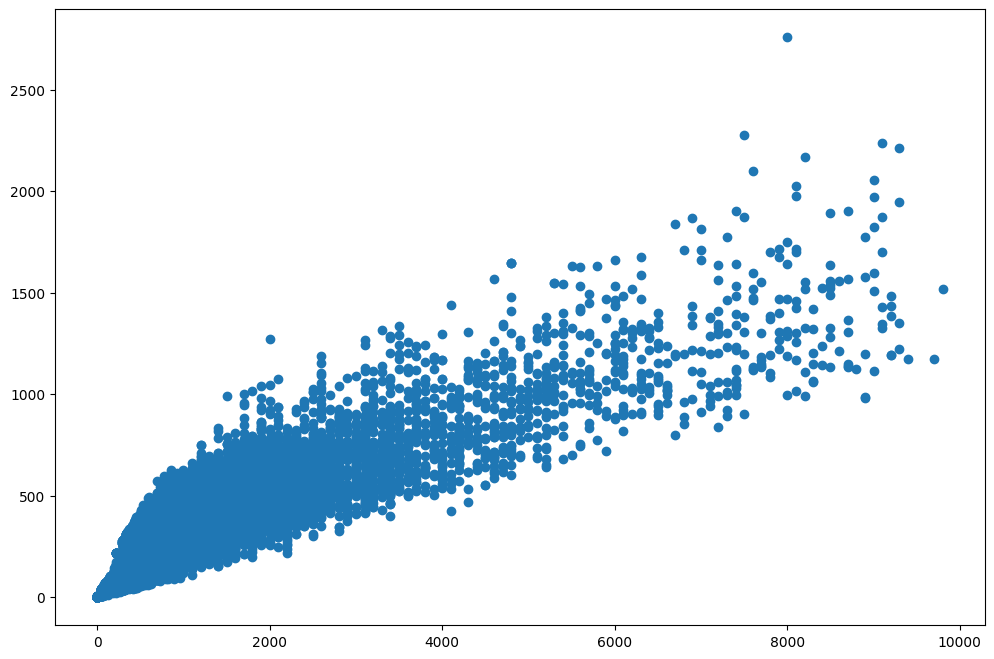

In [65]:
# NOTICE THAT THE CORRELATION IS ALMOST LINEAR --> WE CAN PREDICT THE VALUES
plt.rcParams['figure.figsize'] = (12, 8)
new_data = data[data['kw_max_min'] < 10000]
max_min, avg_min = new_data['kw_max_min'], new_data['kw_avg_min']
plt.scatter(max_min, avg_min)
# plt.scatter(data['kw_max_min'][data['kw_max_min'] < 10000], data['kw_avg_min'][data['kw_max_min'] < 10000])

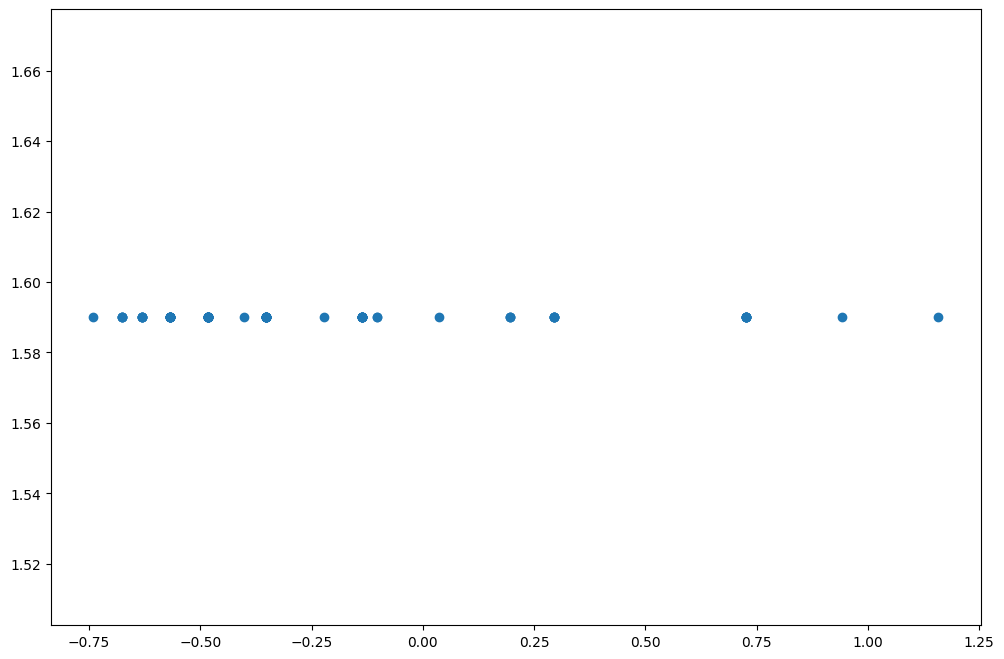

In [74]:
# We look the value of kw_avg_min when kw_max_min == 1.59 and we substitute the value.
new_data = data[data['kw_max_min'] == 1.59]
max_min, avg_min = new_data['kw_avg_min'], new_data['kw_max_min']
plt.scatter(max_min, avg_min)


In [79]:
# CAN THE KW ACTUALLY ASSUME A NEGATIVE VALUE??? SINCE THE VALUE OF KW_AVG_MIN IS QUITE CONSTANT FOR KV_MAX_MIN, WE CAN SUBSTITUTE THE EXPECTED VALUE WHEN IT IS
# FIXED TO 0 FOR EXAMPLE.
new_data['kw_avg_min'].describe()

count    86.000000
mean     -0.232302
std       0.439711
min      -0.741000
25%      -0.482000
50%      -0.352500
75%      -0.136667
max       1.158333
Name: kw_avg_min, dtype: float64

0        110.500000
1        524.750000
2        198.666667
3        444.166667
4        356.200000
            ...    
31710    222.800000
31711    149.759000
31712    196.666667
31713    174.400000
31714    161.000000
Name: kw_avg_min, Length: 31388, dtype: float64

In [61]:

data[data['kw_max_min'] == 1.59][['kw_max_min', 'kw_avg_min']]
# new = data[data['kw_max_min'] == 1.59][['kw_max_min', 'kw_avg_min']]
# new['kw_avg_min'].sort_values(axis = 0)

,kw_max_min,kw_avg_min
33,1.59,-0.352500
133,1.59,0.295000
463,1.59,-0.568333
618,1.59,0.196667
685,1.59,-0.136667
...,...,...
30730,1.59,-0.102500
31120,1.59,1.158333
31263,1.59,-0.482000
31383,1.59,-0.102500


In [ ]:
# look at the values that the variable can assume.
# pd.set_option('display.float_format', '{:.10f}'.format)

# counts = data['num_imgs'].value_counts()
# print(counts)
# for value in data['kw_max_min']:
#     print(value)

In [29]:
# No missing values for most of the features. We can just replace 0 where we have some of them.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31715 entries, 0 to 31714
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url                           31715 non-null  object 
 1   timedelta                     31715 non-null  int64  
 2   n_tokens_title                31715 non-null  int64  
 3   n_tokens_content              31715 non-null  int64  
 4   n_unique_tokens               31715 non-null  float64
 5   n_non_stop_words              31715 non-null  float64
 6   n_non_stop_unique_tokens      31715 non-null  float64
 7   num_hrefs                     31715 non-null  int64  
 8   num_self_hrefs                31715 non-null  int64  
 9   num_imgs                      25340 non-null  float64
 10  num_videos                    25384 non-null  float64
 11  average_token_length          31715 non-null  float64
 12  num_keywords                  25397 non-null  float64
 13  k

In [30]:
# Probably most os the variable are correlated.
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,25340.000000,25384.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,354.058206,10.390730,544.048179,0.530754,0.970140,0.672973,10.865143,3.274381,4.533899,1.259100,...,0.095466,0.756271,-0.259198,-0.521164,-0.107397,0.281647,0.069909,0.341805,0.155974,3407.068863
std,214.314223,2.115643,467.730448,0.137106,0.170203,0.154128,11.295386,3.822364,8.355645,4.176884,...,0.071362,0.247798,0.127508,0.290352,0.094932,0.323834,0.265514,0.188980,0.225957,11899.460219
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,163.000000,9.000000,246.000000,0.471276,1.000000,0.626028,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328333,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,338.000000,10.000000,409.000000,0.539568,1.000000,0.690909,7.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.252976,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,713.000000,0.608523,1.000000,0.754644,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186111,-0.300000,-0.050000,0.500000,0.141667,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,1.000000,1.000000,1.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [31]:
data.select_dtypes(exclude='object')

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,121,12,1015,0.422018,1.0,0.545031,10,6,33.0,1.0,...,0.100000,0.8,-0.160714,-0.500000,-0.071429,0.000000,0.000,0.500000,0.000,2900
1,532,9,503,0.569697,1.0,0.737542,9,0,NaN,1.0,...,0.136364,1.0,-0.157500,-0.250000,-0.100000,0.000000,0.000,0.500000,0.000,1300
2,435,9,232,0.646018,1.0,0.748428,12,3,4.0,1.0,...,0.375000,0.5,-0.427500,-1.000000,-0.187500,0.000000,0.000,0.500000,0.000,17700
3,134,12,171,0.722892,1.0,0.867925,9,5,0.0,NaN,...,0.500000,0.5,-0.216667,-0.250000,-0.166667,0.400000,-0.250,0.100000,0.250,1500
4,728,11,286,0.652632,1.0,0.800000,5,2,NaN,0.0,...,0.100000,0.6,-0.251786,-0.500000,-0.100000,0.200000,-0.100,0.300000,0.100,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,37,11,440,0.564103,1.0,0.718978,10,2,NaN,NaN,...,0.033333,0.2,-0.209167,-0.316667,-0.050000,0.000000,0.000,0.500000,0.000,1000
31711,52,14,0,0.000000,0.0,0.000000,0,0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,0.000000,0.666667,-0.700,0.166667,0.700,11000
31712,121,9,969,0.489583,1.0,0.710623,6,5,2.0,1.0,...,0.062500,1.0,-0.400000,-1.000000,-0.050000,0.000000,0.000,0.500000,0.000,2400
31713,503,11,1976,0.412308,1.0,0.621080,21,3,1.0,3.0,...,0.100000,1.0,-0.323413,-1.000000,-0.050000,0.700000,-0.400,0.200000,0.400,6000


Text(0.5, 1.0, 'Scree plot')

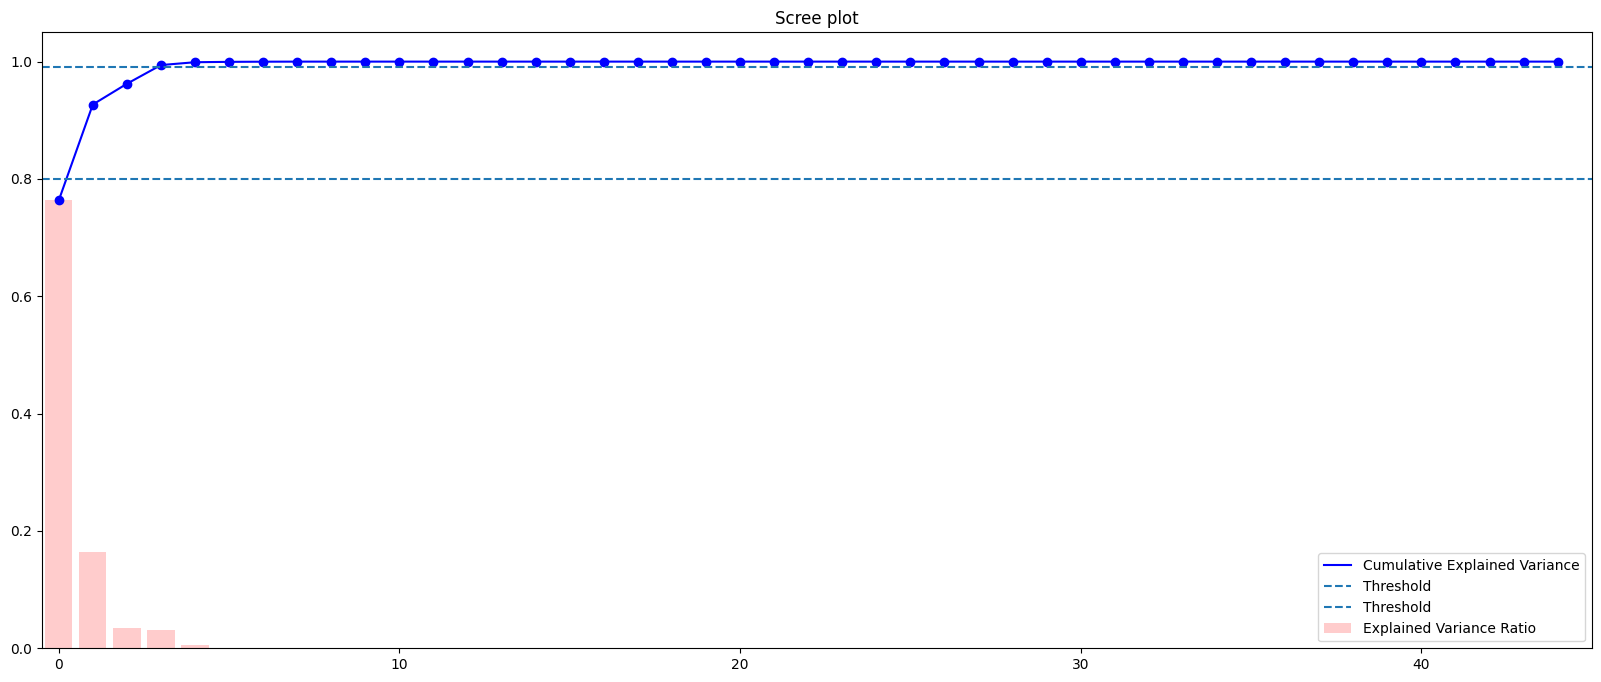

In [110]:
p = PCA()
data_temp = data.fillna(0)
p.fit(data_temp.select_dtypes(exclude='object').drop('shares', axis = 1))
cum = np.cumsum(p.explained_variance_ratio_)

fig, ax = plt.subplots(1, 1)
ax.bar(np.arange(0, 45, 1), p.explained_variance_ratio_, alpha = 0.2, color = 'red', label = 'Explained Variance Ratio')
ax.plot(np.arange(0, 45, 1), cum, c = 'blue', label = 'Cumulative Explained Variance')
ax.scatter(np.arange(0, 45, 1), cum, c = 'blue')
ax.set_xlim(-0.5, 45)
ax.axhline(y = 0.8, linestyle = '--', label = 'Threshold')
ax.axhline(y = 0.99 , linestyle = '--', label = 'Threshold')
ax.legend()
ax.set_title('Scree plot')

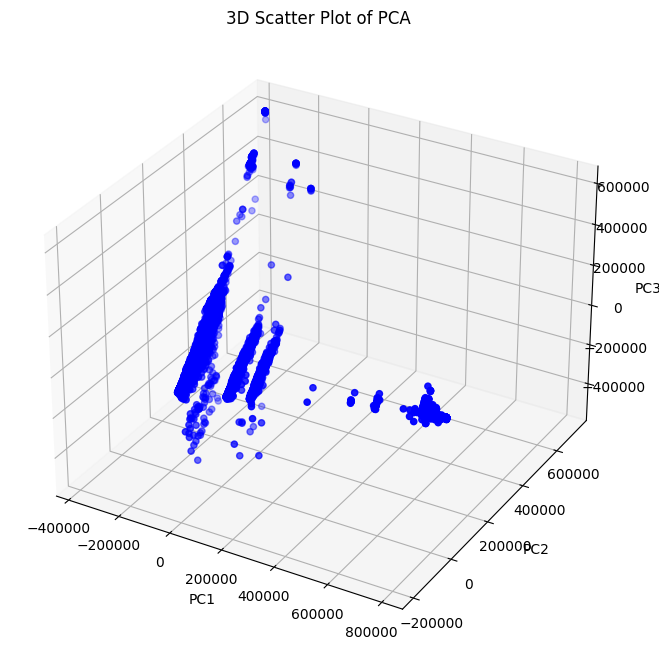

In [108]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.decomposition import PCA

# Generate some random data for demonstration
np.random.seed(42)
X = data_temp.select_dtypes(exclude='object').drop('shares', axis = 1)  # 100 samples with 3 features

# Perform PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Retrieve the first four principal components
components = pca.components_[:4]

# Create a 3D scatter plot for the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='b', marker='o')

# Plot the first four principal components as vectors
origin = [0, 0, 0]  # Origin point for the vectors
# for i, component in enumerate(components):
#     ax.quiver(*origin, *component, color='r', length=0.5)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Scatter Plot of PCA')

# Show the plot
plt.show()


In [105]:
data_temp.select_dtypes(exclude='object').shape
data_temp.select_dtypes(exclude='object').drop('shares', axis = 1).shape

(31715, 45)

In [69]:
data_pca = p.transform(data_temp.select_dtypes(exclude='object'))

(31715, 4)


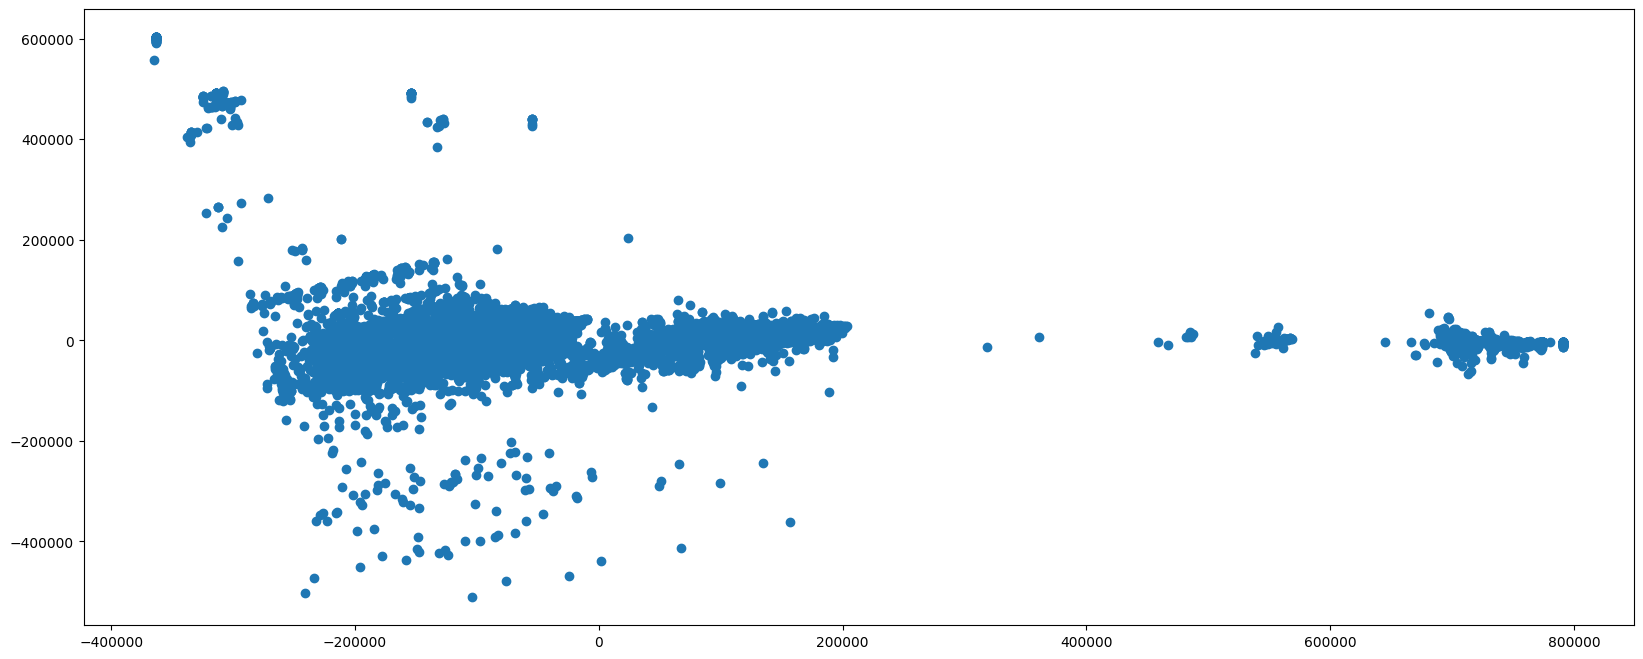

In [92]:

print(data_pca[:, 0:4].shape)


In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31715 entries, 0 to 31714
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url                           31715 non-null  object 
 1   timedelta                     31715 non-null  int64  
 2   n_tokens_title                31715 non-null  int64  
 3   n_tokens_content              31715 non-null  int64  
 4   n_unique_tokens               31715 non-null  float64
 5   n_non_stop_words              31715 non-null  float64
 6   n_non_stop_unique_tokens      31715 non-null  float64
 7   num_hrefs                     31715 non-null  int64  
 8   num_self_hrefs                31715 non-null  int64  
 9   num_imgs                      25340 non-null  float64
 10  num_videos                    25384 non-null  float64
 11  average_token_length          31715 non-null  float64
 12  num_keywords                  25397 non-null  float64
 13  k

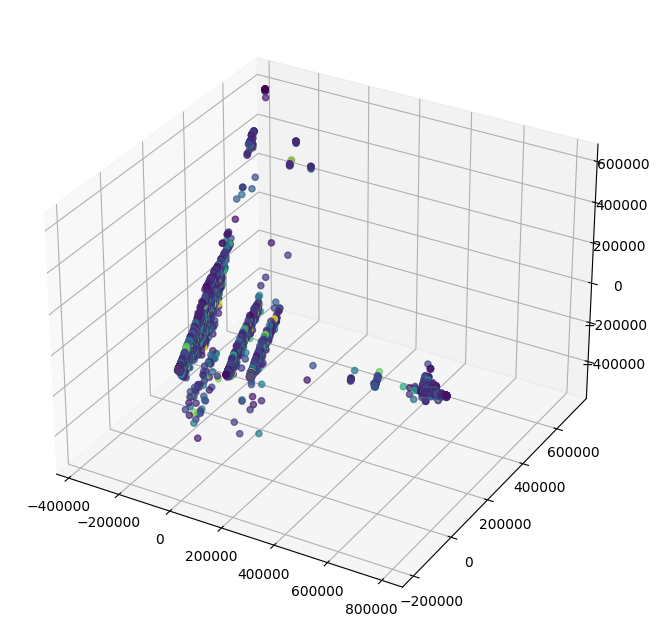

In [48]:
from mpl_toolkits import mplot3d

data_temp = data_temp[data_temp['shares'] < 10000]
transformed = p.transform(data_temp.select_dtypes(exclude='object'))
fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot the data points in 3D space
ax.scatter3D(transformed[:, 0], transformed[:, 1], transformed[:, 2], c = data_temp['shares'],
             alpha = 0.7, vmin = data_temp['shares'].min(), vmax = data_temp['shares'].max())


In [44]:
data_temp

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,http://mashable.com/2014/09/08/safest-cabbies-...,121,12,1015,0.422018,1.0,0.545031,10,6,33.0,...,-0.160714,-0.500000,-0.071429,0.000000,0.000,0.500000,0.000,2900,bus,tuesday
1,http://mashable.com/2013/07/25/3d-printed-rifle/,532,9,503,0.569697,1.0,0.737542,9,0,0.0,...,-0.157500,-0.250000,-0.100000,0.000000,0.000,0.500000,0.000,1300,tech,thursday
2,http://mashable.com/2013/10/30/digital-dinosau...,435,9,232,0.646018,1.0,0.748428,12,3,4.0,...,-0.427500,-1.000000,-0.187500,0.000000,0.000,0.500000,0.000,17700,lifestyle,wednesday
3,http://mashable.com/2014/08/27/homer-simpson-i...,134,12,171,0.722892,1.0,0.867925,9,5,0.0,...,-0.216667,-0.250000,-0.166667,0.400000,-0.250,0.100000,0.250,1500,bus,wednesday
4,http://mashable.com/2013/01/10/creepy-robotic-...,728,11,286,0.652632,1.0,0.800000,5,2,0.0,...,-0.251786,-0.500000,-0.100000,0.200000,-0.100,0.300000,0.100,1400,tech,thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,http://mashable.com/2014/11/30/star-wars-guard...,37,11,440,0.564103,1.0,0.718978,10,2,0.0,...,-0.209167,-0.316667,-0.050000,0.000000,0.000,0.500000,0.000,1000,world,tuesday
31711,http://mashable.com/2014/11/14/uk-floods/,52,14,0,0.000000,0.0,0.000000,0,0,0.0,...,0.000000,0.000000,0.000000,0.666667,-0.700,0.166667,0.700,11000,lifestyle,monday
31712,http://mashable.com/2014/09/08/paypal-bitcoin-...,121,9,969,0.489583,1.0,0.710623,6,5,2.0,...,-0.400000,-1.000000,-0.050000,0.000000,0.000,0.500000,0.000,2400,tech,tuesday
31713,http://mashable.com/2013/08/23/mashable-androi...,503,11,1976,0.412308,1.0,0.621080,21,3,1.0,...,-0.323413,-1.000000,-0.050000,0.700000,-0.400,0.200000,0.400,6000,lifestyle,friday


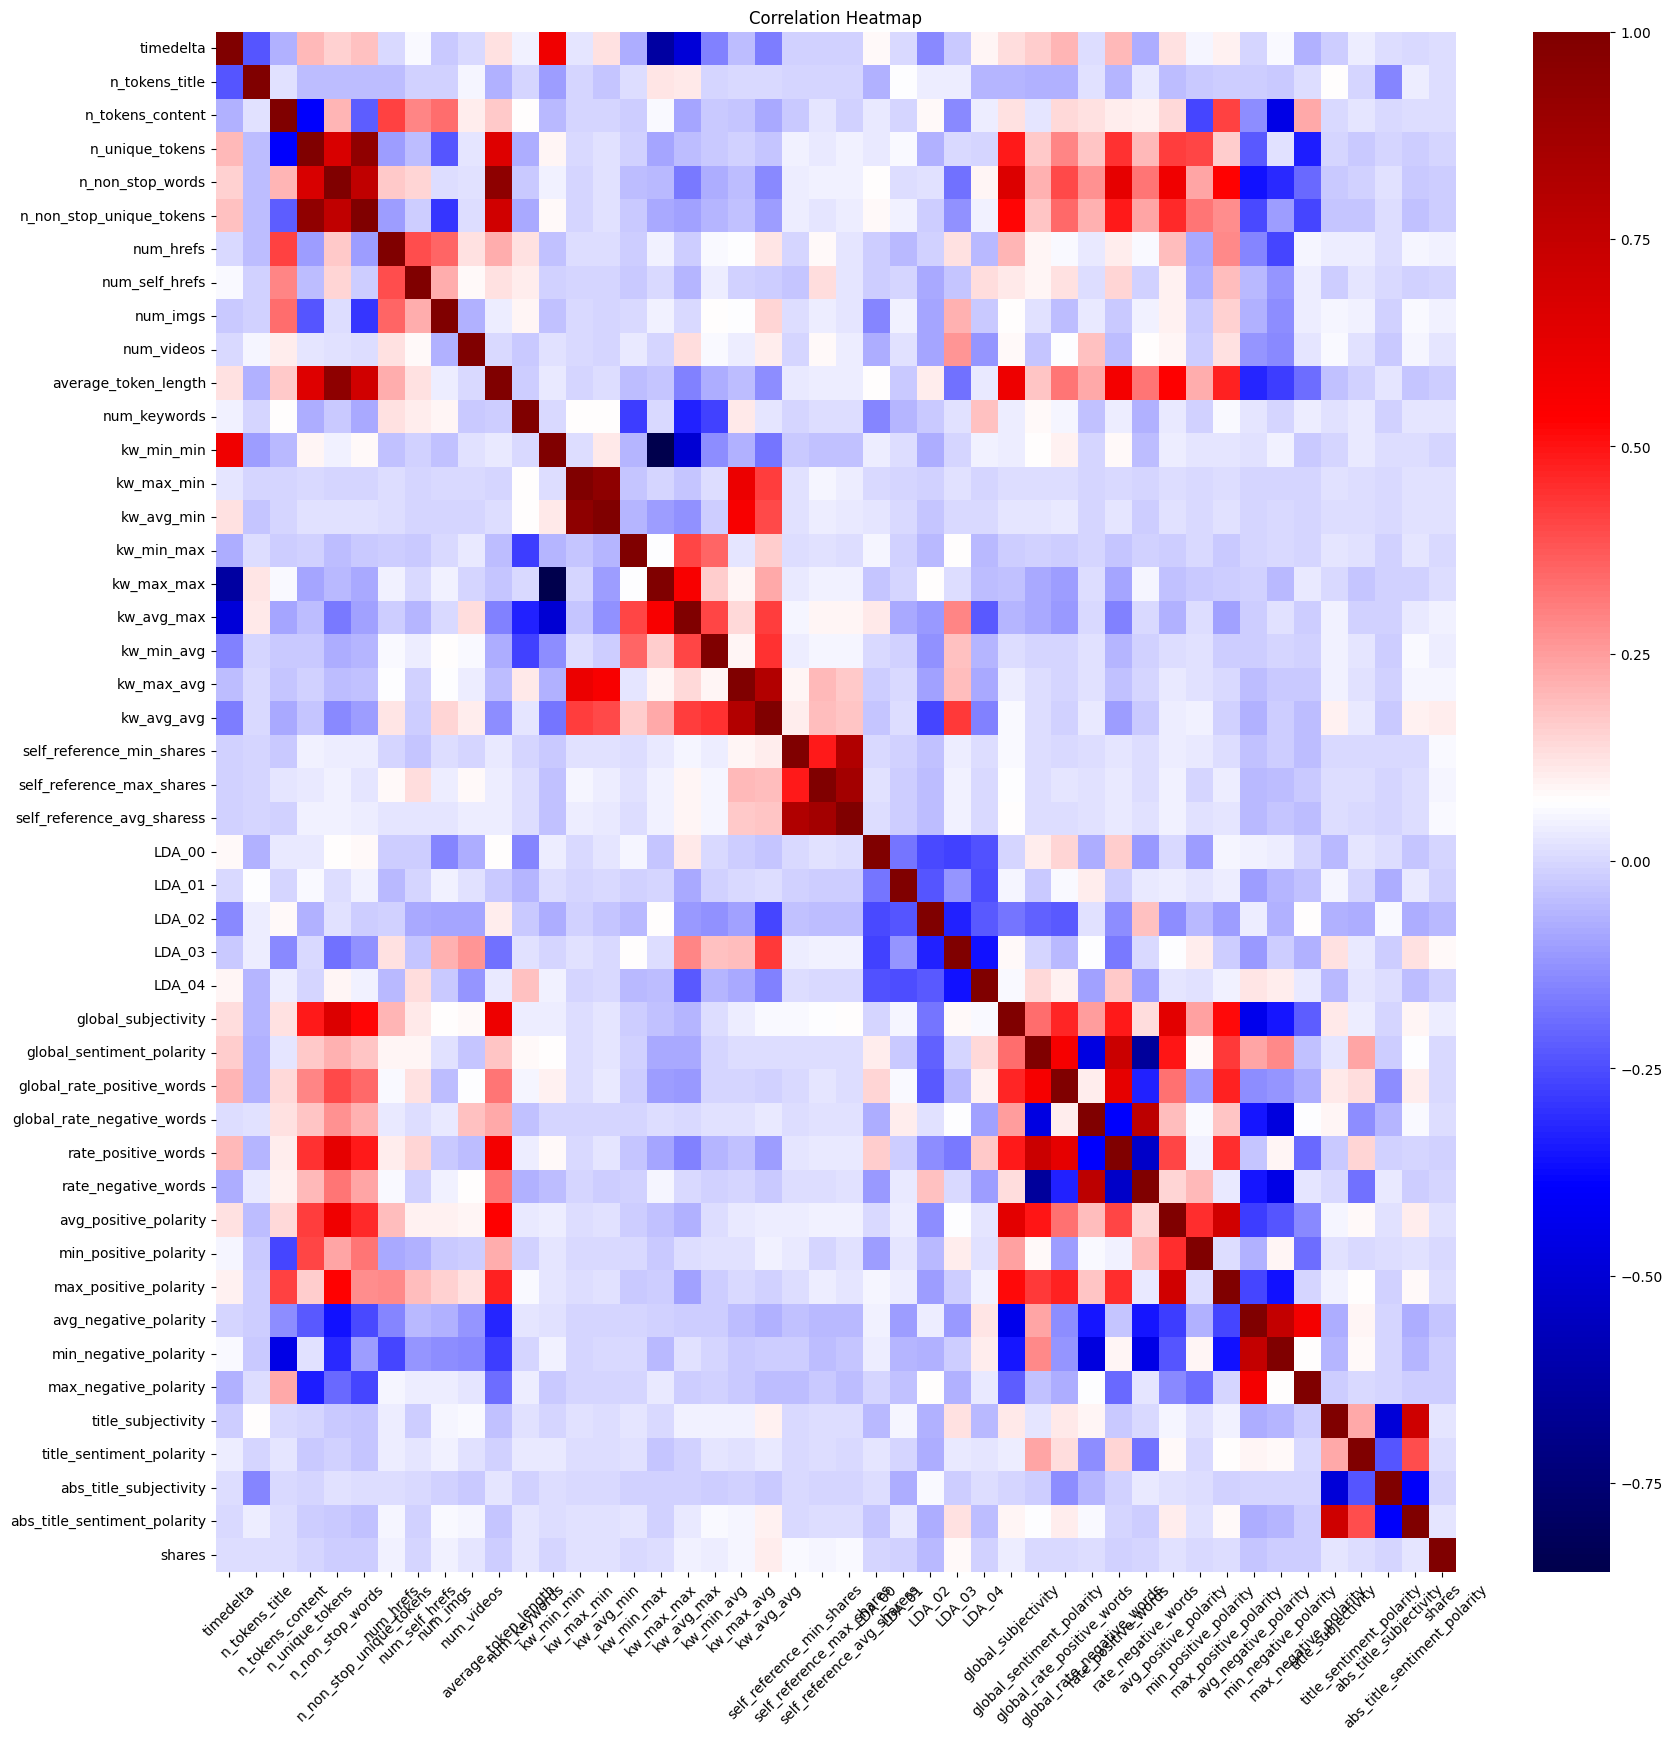

In [33]:
# Quick and dirty to look for correlations.

# Calculate the correlation matrix
correlation_matrix = data.select_dtypes(exclude='object').corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))  # Set the figure size
sns.heatmap(correlation_matrix, cmap='seismic')

# Customize the plot
plt.title('Correlation Heatmap')  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability

# Display the heatmap
plt.show()


In [35]:
correlation_matrix['min_negative_polarity'].sort_values()

global_rate_negative_words   -0.478300
rate_negative_words          -0.452099
n_tokens_content             -0.450686
max_positive_polarity        -0.360427
global_subjectivity          -0.349676
                                ...   
min_positive_polarity         0.090573
LDA_04                        0.102377
global_sentiment_polarity     0.284278
avg_negative_polarity         0.749310
min_negative_polarity         1.000000
Name: min_negative_polarity, Length: 46, dtype: float64

array([[<Axes: title={'center': 'timedelta'}>,
        <Axes: title={'center': 'n_tokens_title'}>,
        <Axes: title={'center': 'n_tokens_content'}>],
       [<Axes: title={'center': 'n_unique_tokens'}>,
        <Axes: title={'center': 'n_non_stop_words'}>,
        <Axes: title={'center': 'n_non_stop_unique_tokens'}>],
       [<Axes: title={'center': 'num_hrefs'}>,
        <Axes: title={'center': 'num_self_hrefs'}>,
        <Axes: title={'center': 'num_imgs'}>]], dtype=object)

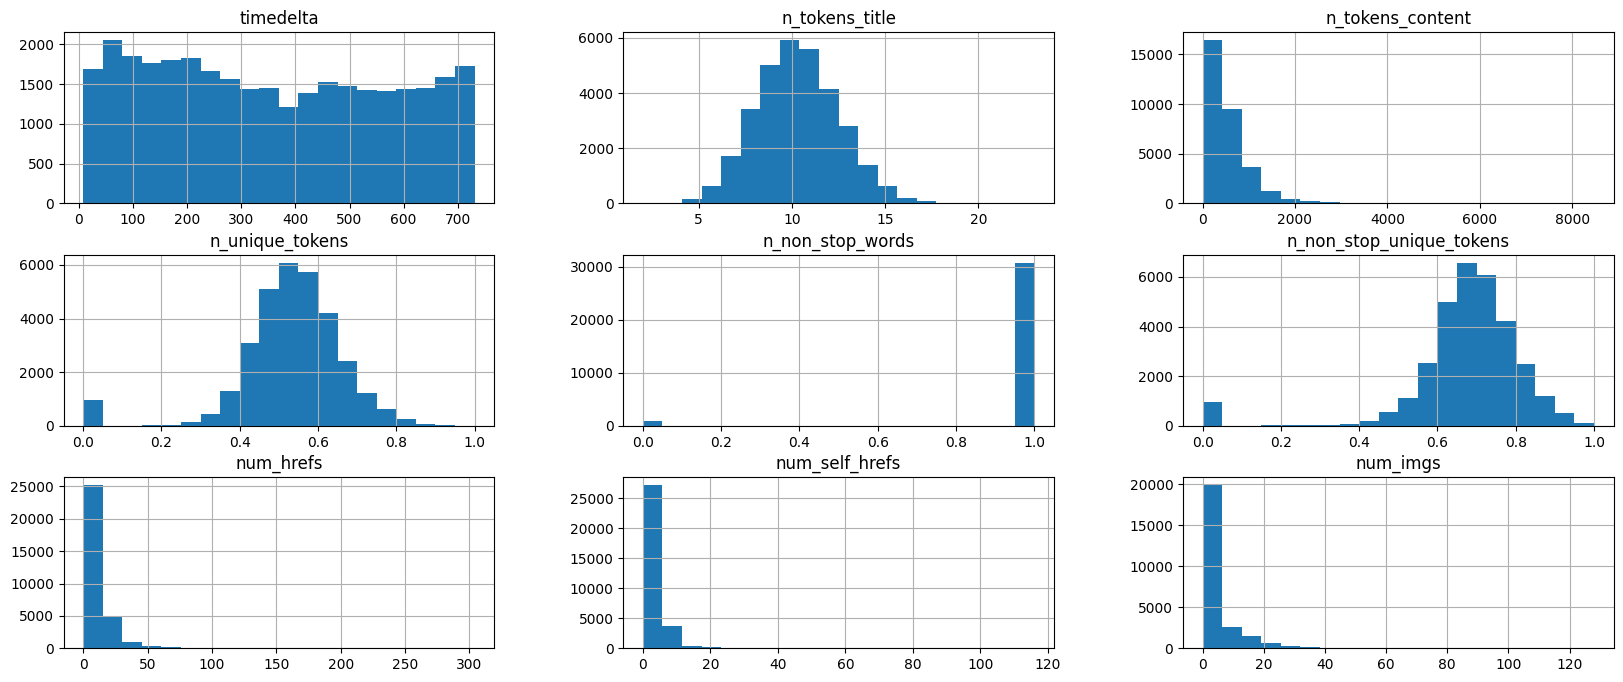

In [77]:
data.iloc[:, 0: 10].hist(bins = 20)

# 0:10 columns:
# timedelta                <-- close to UNIFORM
# n_tokens_title           <-- close to NORMAL
# n_tokens_content s       <-- skewed, OUTLIERS
# n_unique_tokens          <-- close to NORMAL
# n_non_stop_words         <-- BINARY 0-1
# n_non_stop_unique_tokens <-- close to NORMAL, check strange values close to zero
# num_hrefs                <-- skewed, OUTLIERS
# num_self_hrefs           <-- skewed, OUTLIERS
# num_imgs                 <-- skewed, OUTLIERS

# SUMMARY
# Lot of OUTLIERS, it should be possible to STANDARDIZE (all close to NORMAL) and apply the LOGARITHM (close to LOGNORMAL).

array([[<Axes: title={'center': 'num_videos'}>,
        <Axes: title={'center': 'average_token_length'}>,
        <Axes: title={'center': 'num_keywords'}>],
       [<Axes: title={'center': 'kw_min_min'}>,
        <Axes: title={'center': 'kw_max_min'}>,
        <Axes: title={'center': 'kw_avg_min'}>],
       [<Axes: title={'center': 'kw_min_max'}>,
        <Axes: title={'center': 'kw_max_max'}>,
        <Axes: title={'center': 'kw_avg_max'}>]], dtype=object)

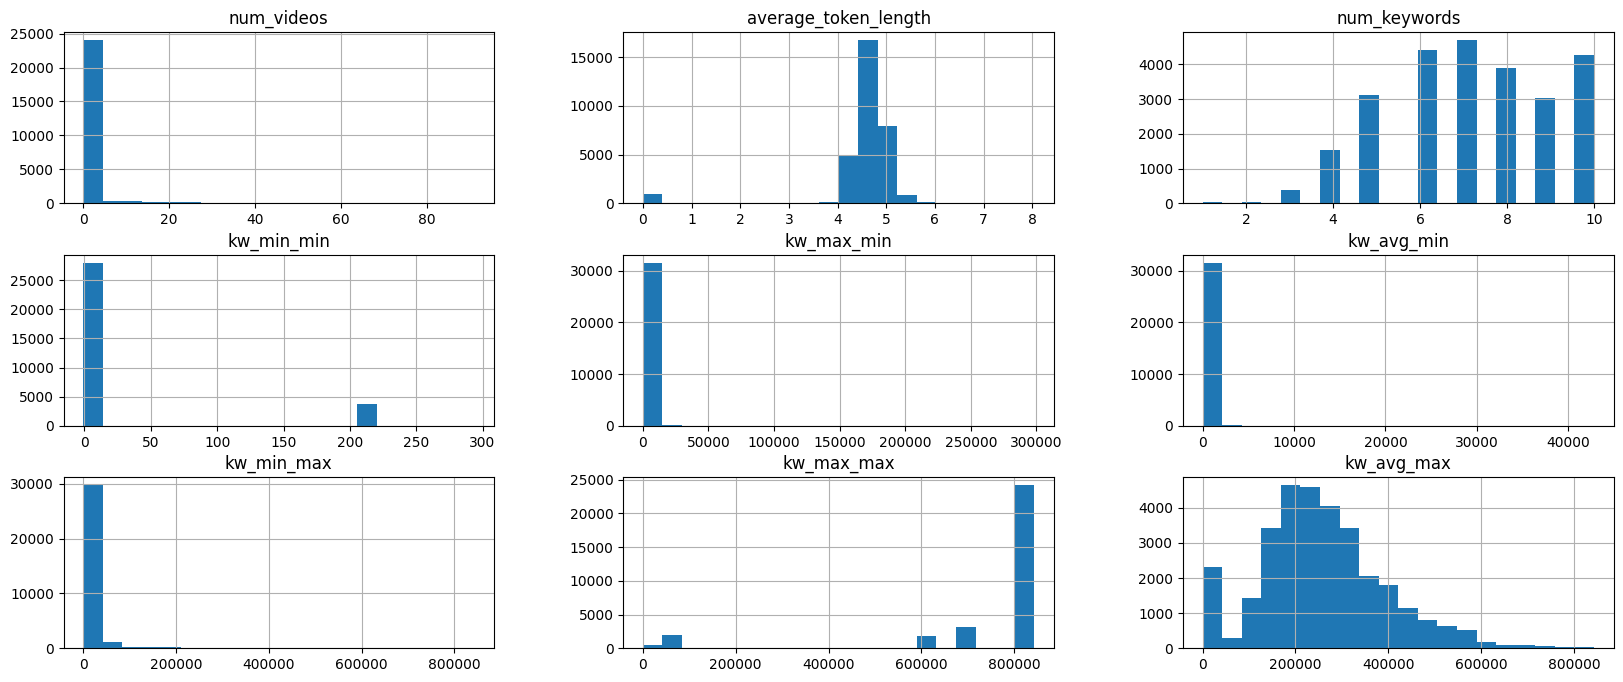

In [78]:
data.iloc[:, 10: 19].hist(bins = 20)

# 10:19 columns:
# num_video                <-- skewed, OUTLIERS
# average_token_length     <-- close to NORMAL, check ZERO
# num_keywords             <-- seems BIMODAL
# kw_min_min               <-- seems BINARY
# kw_max_min               <-- OUTLIERS
# kw_avg_min               <-- OUTLIERS
# kw_min_max               <-- skewed, OUTLIERS
# kw_max_max               <-- skewed, OUTLIERS
# kw_avg_max               <-- close to NORMAL, consider LOGARITM

# SUMMARY
# Lot of OUTLIERS, it should be convenient to apply the LOGARITHM (all positive).

In [22]:
# NO DUPLICATES
data[(data['url'].value_counts() > 1).values]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday


array([[<Axes: title={'center': 'kw_max_avg'}>,
        <Axes: title={'center': 'kw_avg_avg'}>,
        <Axes: title={'center': 'self_reference_min_shares'}>],
       [<Axes: title={'center': 'self_reference_max_shares'}>,
        <Axes: title={'center': 'self_reference_avg_sharess'}>,
        <Axes: title={'center': 'LDA_00'}>],
       [<Axes: title={'center': 'LDA_01'}>,
        <Axes: title={'center': 'LDA_02'}>,
        <Axes: title={'center': 'LDA_03'}>]], dtype=object)

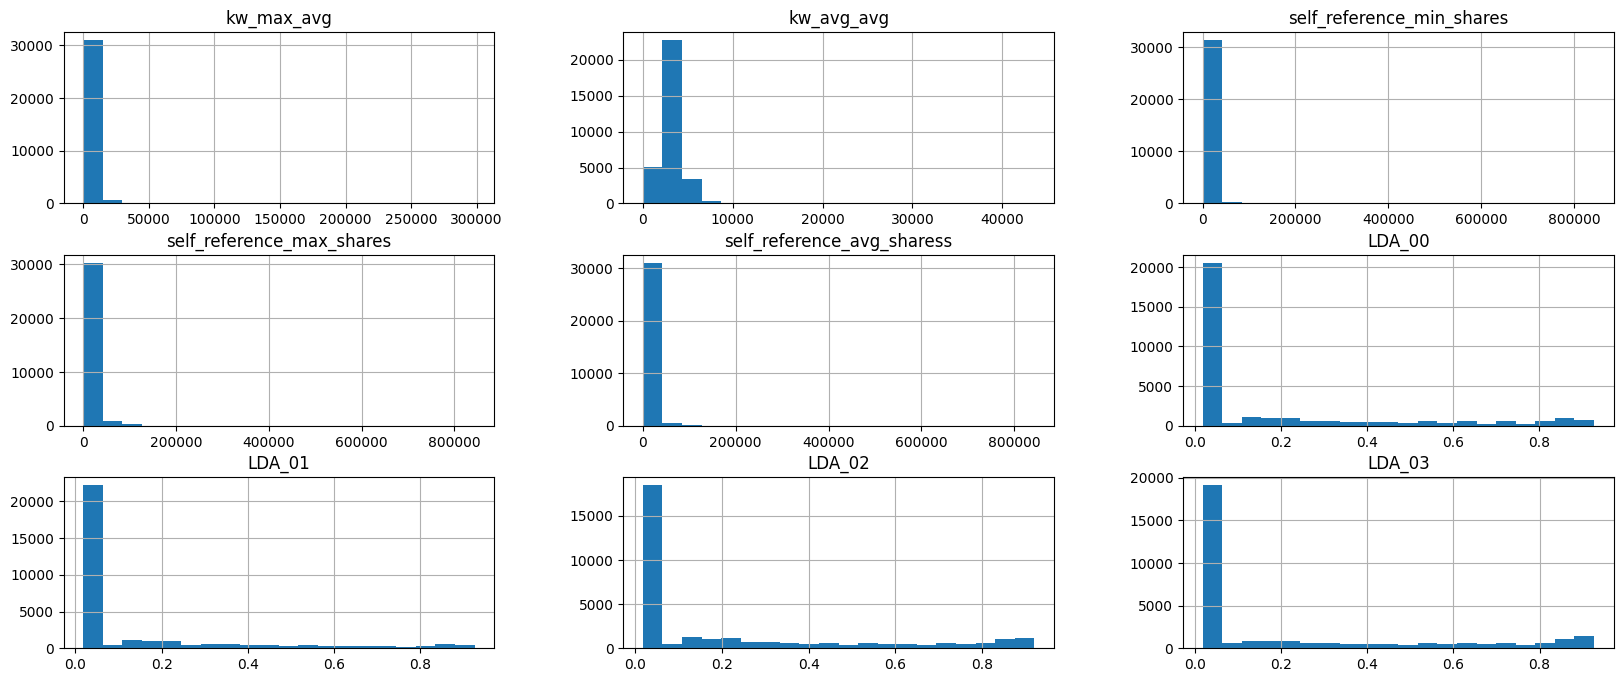

In [79]:
data.iloc[:, 20: 29].hist(bins = 20)

# 20:29 columns:
# kw_max_avg                <-- skewed, OUTLIERS
# kw_avg_avg                <-- skewed, OUTLIERS
# self_reference_min_shares <-- skewed, OUTLIERS
# self_reference_max_shares <-- skewed, OUTLIERS
# self_reference_avg_shares <-- skewed, OUTLIERS
# LDA_00                    <-- skewed, seems UNIFORM
# LDA_01                    <-- skewed, seems UNIFORM
# LDA_02                    <-- skewed, seems UNIFORM
# LDA_03                    <-- skewed, seems UNIFORM

# SUMMARY
# All skewed and POSITIVE. Lot of OUTLIERS and UNIFORM behaviours.

(array([566., 757., 749., 789., 871., 778., 731., 733., 748., 627., 779.,
        696., 680., 814., 661., 653., 634., 669., 627., 646., 533., 578.,
        615., 580., 573., 340., 624., 477., 604., 559., 663., 549., 648.,
        507., 626., 524., 596., 568., 563., 593., 564., 599., 554., 593.,
        569., 660., 626., 687., 681., 654.]),
 array([  8.  ,  22.46,  36.92,  51.38,  65.84,  80.3 ,  94.76, 109.22,
        123.68, 138.14, 152.6 , 167.06, 181.52, 195.98, 210.44, 224.9 ,
        239.36, 253.82, 268.28, 282.74, 297.2 , 311.66, 326.12, 340.58,
        355.04, 369.5 , 383.96, 398.42, 412.88, 427.34, 441.8 , 456.26,
        470.72, 485.18, 499.64, 514.1 , 528.56, 543.02, 557.48, 571.94,
        586.4 , 600.86, 615.32, 629.78, 644.24, 658.7 , 673.16, 687.62,
        702.08, 716.54, 731.  ]),
 <BarContainer object of 50 artists>)

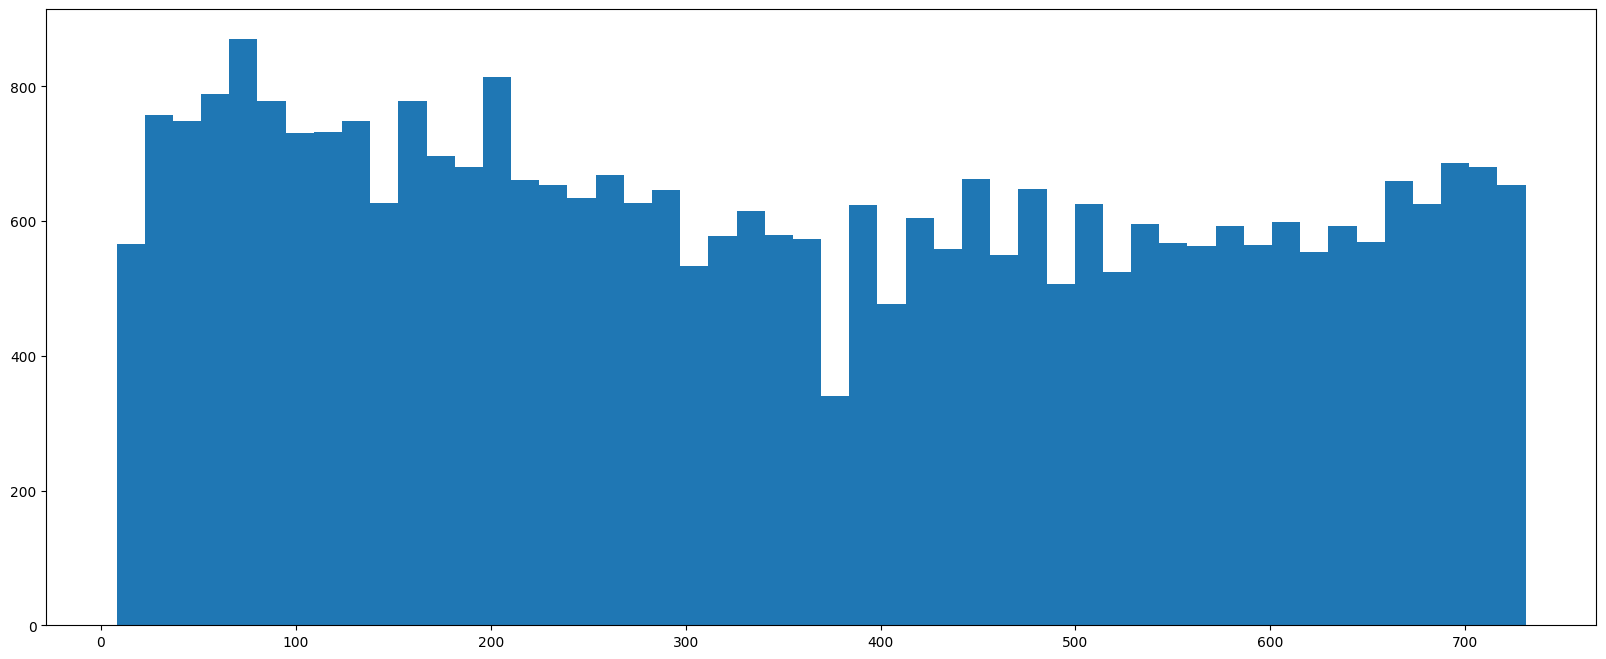

In [118]:
# map = plt.colormaps['viridis']
# norm = plt.Normalize(vmin=min(data['shares']), vmax=max(data['shares']))
plt.hist(data['timedelta'], bins = 50)

array([[<Axes: title={'center': 'global_subjectivity'}>,
        <Axes: title={'center': 'global_sentiment_polarity'}>,
        <Axes: title={'center': 'global_rate_positive_words'}>],
       [<Axes: title={'center': 'global_rate_negative_words'}>,
        <Axes: title={'center': 'rate_positive_words'}>,
        <Axes: title={'center': 'rate_negative_words'}>],
       [<Axes: title={'center': 'avg_positive_polarity'}>,
        <Axes: title={'center': 'min_positive_polarity'}>,
        <Axes: title={'center': 'max_positive_polarity'}>]], dtype=object)

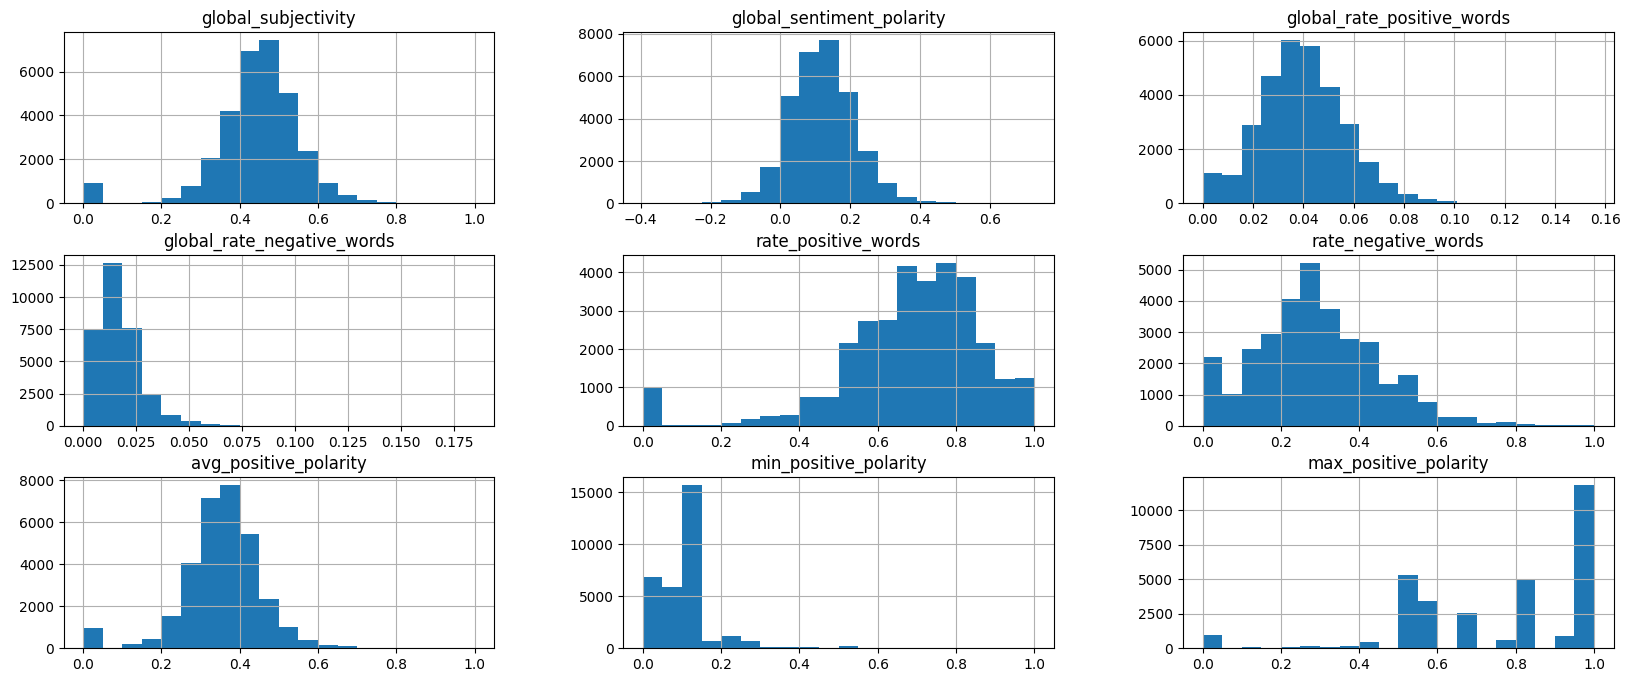

In [80]:
data.iloc[:, 30: 39].hist(bins = 20)

# 30:39 columns:
# global_subjectivity        <-- close to NORMAL
# global_sentiment_polarity  <-- close to NORMAL
# global_rate_positive_words <-- close to NORMAL, OUTLIERS
# global_rate_negative_words <-- skewed, OUTLIERS
# rate_positive_words        <-- skewed
# rate_negative_words        <-- skewed
# avg_positive_polarity      <-- close to NORMAL
# min_positive_polarity      <-- skewed, OUTLIERS
# max_positive_polarity      <-- skewed

# SUMMARY
# All skewed and close to NORMAL.

array([[<Axes: title={'center': 'min_negative_polarity'}>,
        <Axes: title={'center': 'max_negative_polarity'}>,
        <Axes: title={'center': 'title_subjectivity'}>],
       [<Axes: title={'center': 'title_sentiment_polarity'}>,
        <Axes: title={'center': 'abs_title_subjectivity'}>,
        <Axes: title={'center': 'abs_title_sentiment_polarity'}>],
       [<Axes: title={'center': 'shares'}>, <Axes: >, <Axes: >]],
      dtype=object)

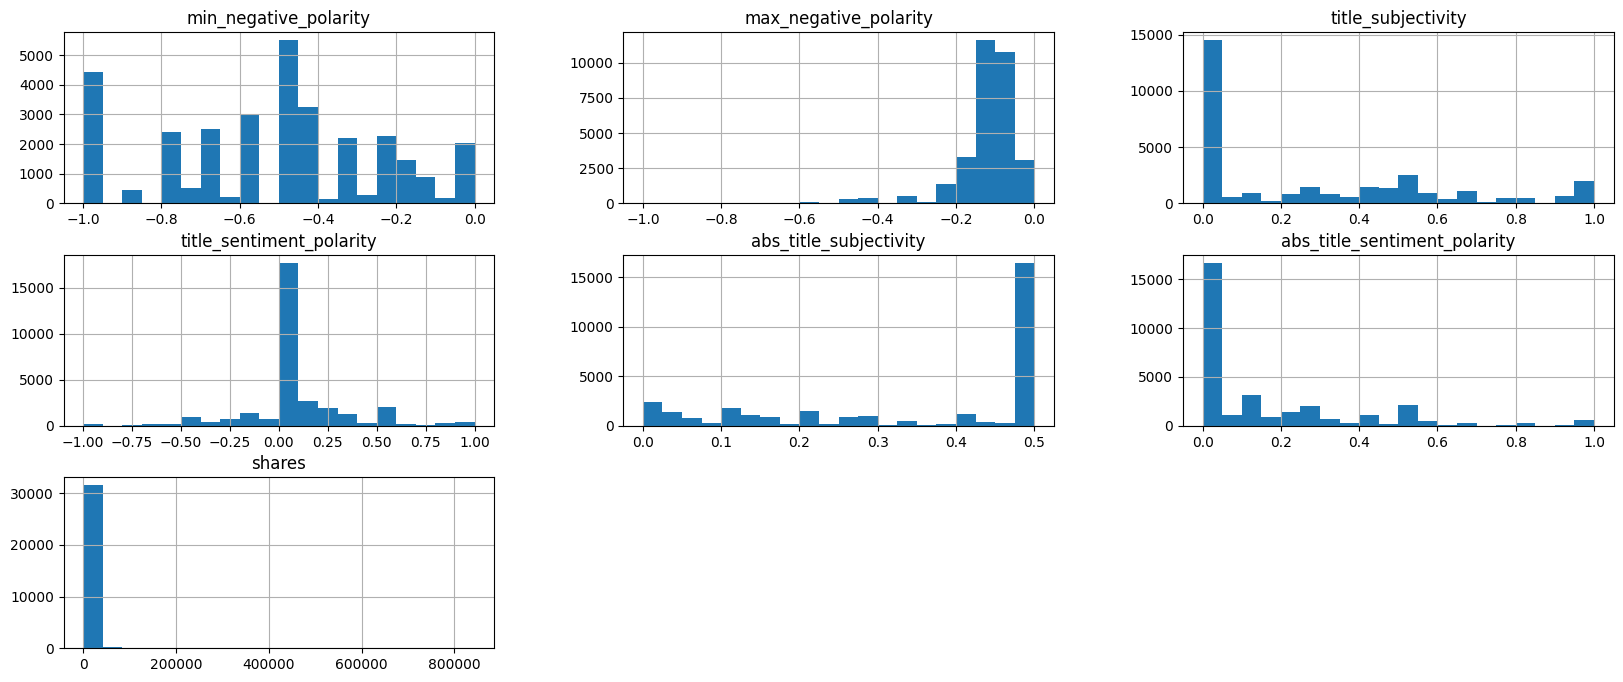

In [81]:
data.iloc[:, 40: 49].hist(bins = 20)

# 40:49 columns:
# min_negative_polarity        <-- close to NORMAL (?)
# max_negative_polarity        <-- skewed, OUTLIERS
# title_subjectivity           <-- skewed, seems UNIFORM
# title_sentiment_polarity     <-- close to NORMAL, OUTLIERS
# abs_title_subjectivity       <-- cyclical behaviour
# abs_title_sentiment_polarity <-- cyclical behaviour
# shares                       <-- OUTLIERS

# SUMMARY
# Lot of skewness and weird distributions.

KeyError: '[50900, 47100, 88500, 52700, 46300, 42000, 77400, 57800, 38200, 138700, 41700, 32500, 40000, 53800, 306100, 46800, 298400, 33600, 41000, 87000, 57400, 51900, 34100, 34800, 104100, 652900, 37700, 53000, 118700, 80800, 52500, 60300, 108400, 50600, 59000, 69500, 53100, 80400, 43000, 33100, 66900, 92100, 95400, 55600, 48000, 37500, 69000, 36100, 95100, 36300, 35100, 75500, 96900, 40600, 55200, 36200, 37000, 31900, 43600, 41800, 94800, 47300, 105400, 37300, 58100, 32200, 74300, 38800, 310800, 93800, 84800, 71700, 39900, 95300, 35700, 54200, 112600, 35500, 52600, 53200, 43700, 52900, 64300, 45800, 38900, 54600, 128900, 96100, 77200, 38400, 81700, 36600, 233400, 33400, 180600, 35800, 72900, 48700, 41100, 37900, 40100, 45400, 34600, 843300, 70200, 96000, 46400, 47800, 42200, 77600, 48800, 43200, 102500, 106400, 210300, 33900, 45900, 61500, 71000, 32299, 112500, 39500, 50700, 141400, 110200, 36500, 45100, 663600, 48500, 83300, 39000, 40400, 144400, 37200, 42500, 58800, 56500, 58400, 227300, 32000, 32700, 79900, 60200, 37800, 98000, 63100, 39200, 62000, 33000, 50000, 49500, 47700, 57100, 205600, 196700, 208300, 34300, 145500, 34500, 86200, 97200, 133700, 53500, 46100, 64400, 69300, 36800, 36700, 32600, 59400, 38600, 49000, 71800, 284700, 115700, 77800, 65300, 39400, 34900, 32100, 42700, 57000, 35400, 62300, 56900, 102200, 40300, 78600, 53700, 35900, 44300, 35200, 143100, 42400, 70600, 81200, 35300, 44800, 44700, 32400, 128800, 67500, 39800, 51500, 42600, 39700, 64099, 44100, 122800, 45000, 54300, 53900, 41600, 62900, 41200, 100300, 42300, 33500, 39300, 61600, 36900, 47400, 54700, 65900, 158900, 56400, 111300, 82000, 49800, 71300, 211600, 43100, 63300, 139600, 33800, 86300, 690400, 37400, 82200, 67300, 109800, 69100, 40200, 50200, 34700, 193400, 441000, 57500, 89500, 75600, 60100, 51000, 119100, 49700, 92600, 50100, 39100] not in index'

<Axes: >

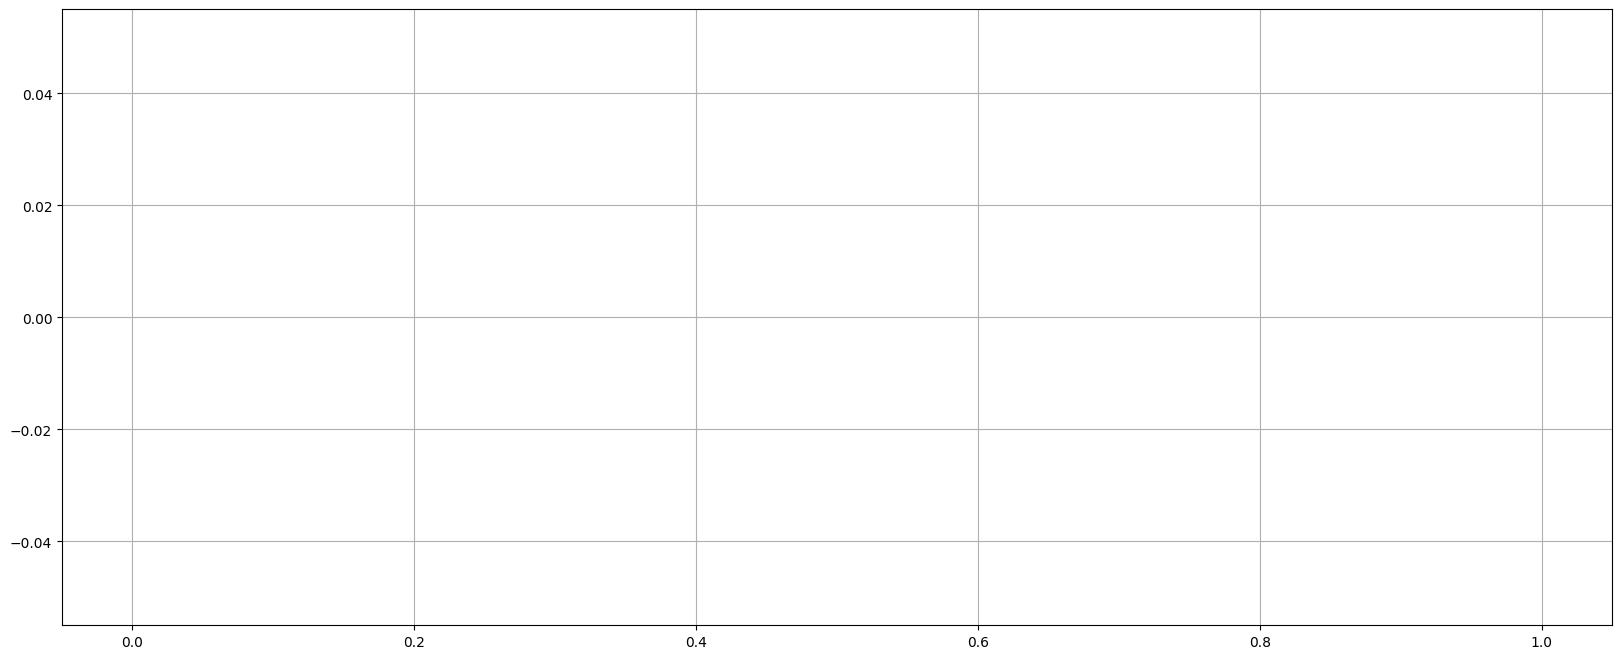

In [17]:
data['shares'][data['shares'] == 0].hist()

In [24]:
data['shares'][data['shares'] < 15]

9882     8
12163    4
15625    5
Name: shares, dtype: int64